In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('Algeria_forest_updated.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df=df.drop(['day','month','year'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [6]:
df['Classes']=df['Classes'].map({'fire':0,'not fire':1,'nan':np.nan})

In [7]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [8]:
x.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,-0.586639,0.089408
Classes,-0.516015,0.432161,0.069964,0.379097,-0.769492,-0.585658,-0.511123,-0.735197,-0.586639,1.000000,-0.162347


<AxesSubplot: >

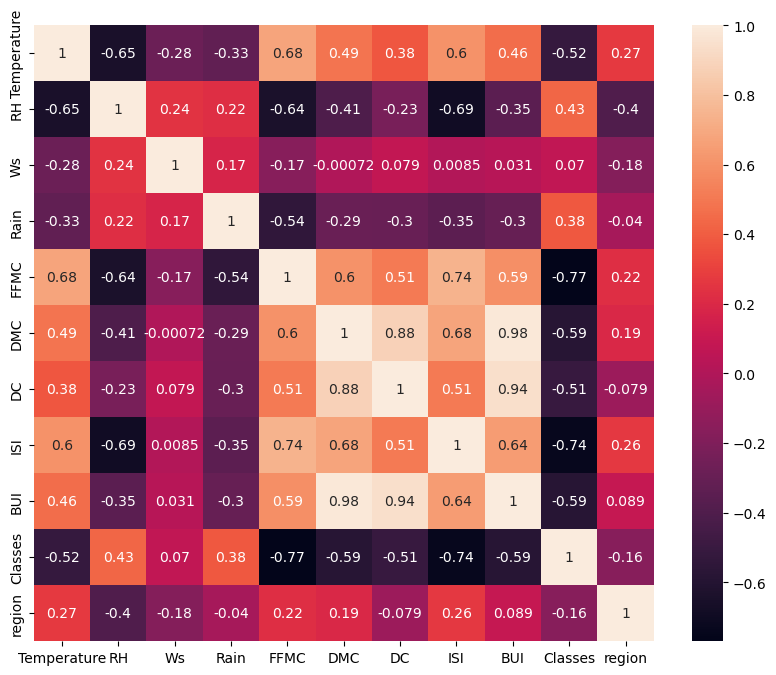

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(x.corr(),annot=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
corr=x_train.corr()

<AxesSubplot: >

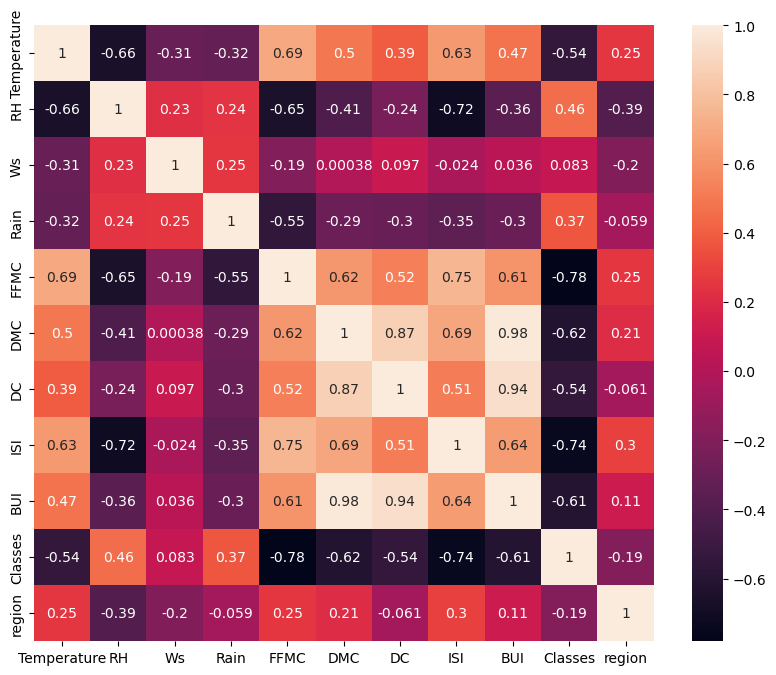

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

## Feature Selection

In [14]:
def correlation(corr,thresh):
    col_names=set()
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            if i!=j:
                if abs(corr.iloc[i,j]>thresh):
                    col_names.add(corr.columns[i])
                    
                    
                    
    return col_names            
        
        
    

In [15]:
correlation(corr,0.85)

{'BUI', 'DC', 'DMC'}

In [16]:
## Above are the columns whcih are highly corrleated. So we can remove any two of them

In [17]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,1.0,1
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,1.0,2
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,0.0,2
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,1.0,1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,1.0,1
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,1.0,1
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,1.0,1
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,0.0,2


In [18]:
x_train.drop(['BUI','DC'],axis=1,inplace=True)

In [19]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
97,29,74,19,0.1,75.8,3.6,2.1,1.0,1
141,31,72,14,0.2,60.2,3.8,0.8,1.0,2
192,40,31,15,0.0,94.2,22.5,16.6,0.0,2
68,32,60,18,0.3,77.1,11.3,2.2,1.0,1
119,32,47,14,0.7,77.5,7.1,1.8,1.0,1
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,1.0,1
14,28,80,17,3.1,49.4,3.0,0.4,1.0,1
92,25,76,17,7.2,46.0,1.3,0.2,1.0,1
179,34,59,16,0.0,88.1,19.5,7.4,0.0,2


In [20]:
x_test.drop(['BUI','DC'],axis=1,inplace=True)

In [21]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
x_train_scaled=scaler.fit_transform(x_train)

In [25]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
        -0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
        -0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         1.10431526, -0.98907071]])

In [26]:
x_test_scaled=scaler.transform(x_test)

## BoxPlot before and after scaling

/tmp/ipykernel_374/2683939153.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Box plot after scaling')

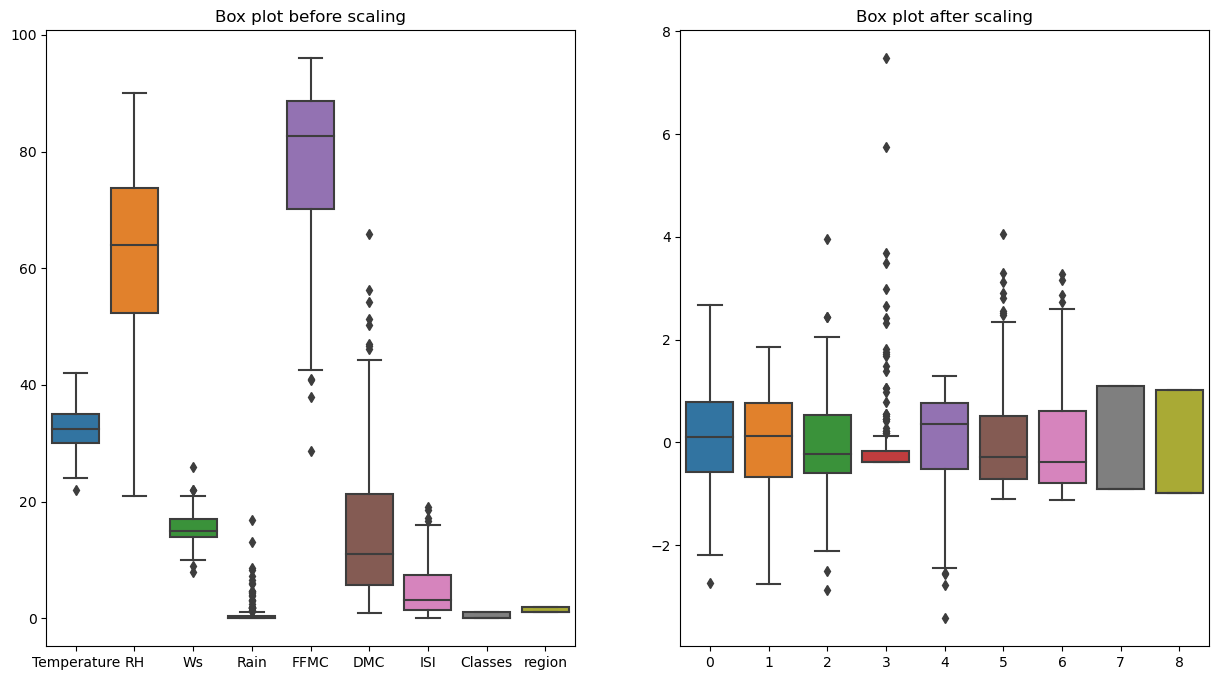

In [27]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('Box plot before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('Box plot after scaling')

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()

In [30]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [31]:
y_pred=regressor.predict(x_test_scaled)

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('r_score:',rscore)

Mean absolute error: 0.546823646524997
r_score: 0.9847657384266951


## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso=Lasso()

In [35]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [36]:
y_predlasso=lasso.predict(x_test_scaled)


In [37]:
mae=mean_absolute_error(y_test,y_predlasso)
rscore=r2_score(y_test,y_predlasso)
print('mae:',mae)
print('r_score',rscore)

mae: 1.133175994914409
r_score 0.9492020263112388


## Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge=Ridge()

In [40]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [41]:
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)
print('mae:',mae)
print('rscore:',rscore)

mae: 0.564230534010569
rscore: 0.9842993364555513


## Elasticnet Regression

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


In [43]:
import pickle

In [44]:
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler'))